In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
# Check for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [ ]:
# Drop rows with null values
data = data.dropna(axis=0)

In [ ]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#Normalising
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[ 1.14926596, -1.31686782, -0.6881801 , ..., -0.79893828,
        -0.63343317, -0.36176815],
       [-0.88204153,  1.12608004, -2.11111658, ...,  1.64131876,
         1.12866215,  0.32232714],
       [ 0.6978643 , -0.78803045,  0.1813922 , ...,  0.75822788,
         0.73764242, -0.34082485],
       ...,
       [ 0.25147821, -0.1328337 , -1.32059631, ..., -0.12921748,
         0.04082521, -0.69050971],
       [ 1.05898563, -0.71315082, -0.05576388, ..., -0.11354131,
        -0.15719119, -0.2039848 ],
       [ 1.219484  , -1.41982731, -1.16249226, ...,  1.93306969,
         1.72020482, -0.81239027]])

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Lr model prediction on trained data
y_pred_lr = lr.predict(X_test)

In [ ]:
#Using polynomial regression
poly = PolynomialFeatures(degree=3)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [ ]:
lr.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = lr.predict(X_test_poly)

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfr = rfr.predict(X_test)

In [ ]:
#Using gridsearch for hyper-parameter tuning, rfr
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Setting multiple values for rfr parameters
random_grid = {'n_estimators': [10, 50, 100,200, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 6, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}

In [ ]:
rfr_random3 = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
#Fitting training data into randomisedsearchcv
rfr_random3.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 6, 10],
                                        'n_estimators': [10, 50, 100, 200, 400,
                                                         500, 600]},
                   random_state=42, verbose=2)

In [ ]:
#Getting best rfr parameters
rfr_random3.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
#Updating rfr with best_params values
rfr_rand3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
#Fitting training data with rfr's best_params
rfr_rand3.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=6, n_estimators=400)

In [ ]:
y_pred_rfr_rand3 = rfr_rand3.predict(X_test)

In [ ]:
#Now with XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor()

In [ ]:
# Train the model with default xgb params
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Model prediction on train data (xgb default)
y_pred_xgb = xgbr.predict(X_test)

In [ ]:
#Setting multiple values for xgb parameters
params={
 "learning_rate"    : [0.001, 0.01, 0.05, 0.1, 0.2, 0.3] ,
 "max_depth"        : [4, 5, 6, 8, 10, 12],
 "min_child_weight" : [1, 3, 5],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5, 1]

}

In [ ]:
xgb_randommock = RandomizedSearchCV(estimator = xgbr, param_distributions= params, cv=3, verbose=2, n_jobs=-1)

In [ ]:
#Fitting training data into randomisedsearchcv
xgb_randommock.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [ ]:
xgb_randommock.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
#Updating xgb with best_params values
xgb_rand_predmock = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Fitting training data with xgb's best_params
xgb_rand_predmock.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Model prediction on trained xgb best params data
y_pred_xgb_rand = xgb_rand_predmock.predict(X_test)

In [ ]:
from sklearn import svm

In [ ]:
reg_1 = svm.SVR(C=100000000, cache_size=200, coef0=0.0, degree=6, epsilon=0.1, gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
reg_1.fit(X_train, y_train)

SVR(C=100000000, degree=6)

In [ ]:
y_pred_reg1 = reg_1.predict(X_test)

In [ ]:
#R2 scores of regression models:
print("Linear Regression: ", r2_score(y_test, y_pred_lr))
print("Polynomial Regression: ", r2_score(y_test, y_pred_poly))
print("Random Forest: ", r2_score(y_test, y_pred_rfr))
print("Random Forest through gridsearch: ", r2_score(y_test, y_pred_rfr_rand3))
print("XGB default: ", r2_score(y_test, y_pred_xgb))
print("XGB with GridSearch: ", r2_score(y_test, y_pred_xgb_rand))
print("XGB with GridSearch: ", r2_score(y_test, y_pred_reg1))

Linear Regression:  0.6400865688993744
Polynomial Regression:  0.7230113909492907
Random Forest:  0.8235945402853782
Random Forest through gridsearch:  0.8242838281232187
XGB default:  0.8243100508232859
XGB with GridSearch:  0.8357425254386621
XGB with GridSearch:  0.6439694655627196


In [ ]:
m_lr, b_lr = np.polyfit(y_test[0:599], y_pred_lr[0:599], 1)
print(m_lr, b_lr)

m_pol, b_pol = np.polyfit(y_test[0:599], y_pred_poly[0:599], 1)
print(m_pol, b_pol)

m_rfr, b_rfr = np.polyfit(y_test[0:599], y_pred_rfr[0:599], 1)
print(m_rfr, b_rfr)

m_rfrand, b_rfrand = np.polyfit(y_test[0:599], y_pred_rfr_rand3[0:599], 1)
print(m_rfrand, b_rfrand)

m_xgbr, b_xgbr = np.polyfit(y_test[0:599], y_pred_xgb[0:599], 1)
print(m_xgbr, b_xgbr)

m_xgbrand, b_xgbrand = np.polyfit(y_test[0:599], y_pred_xgb_rand[0:599], 1)
print(m_xgbrand, b_xgbrand)

0.6318276343910838 77232.15087899042
0.7469415041301453 51945.43085274031
0.8000750121766054 41532.36232658153
0.7965518435347188 42197.23524742758
0.8379930193904792 33521.094663486736
0.8537924221887736 29835.140717201753


In [ ]:
lr_equation = (0.6318*(y_test[0:599]) + 77232)
poly_equation = (0.7469*(y_test[0:599]) + 51945)
rfr_equation = (0.7980*(y_test[0:599]) + 41609)
rfr_rand_equation = (0.7974*(y_test[0:599]) + 42154)
xgbr_equation = (0.8379*(y_test[0:599]) + 33521)
xgb_rand_equation = (0.8537*(y_test[0:599]) + 29835)
svm_rbf_equation = (0.6422*(y_test[0:599]) + 77101)
svm_poly_equation = (0.4108*(y_test[0:599]) + 114767)

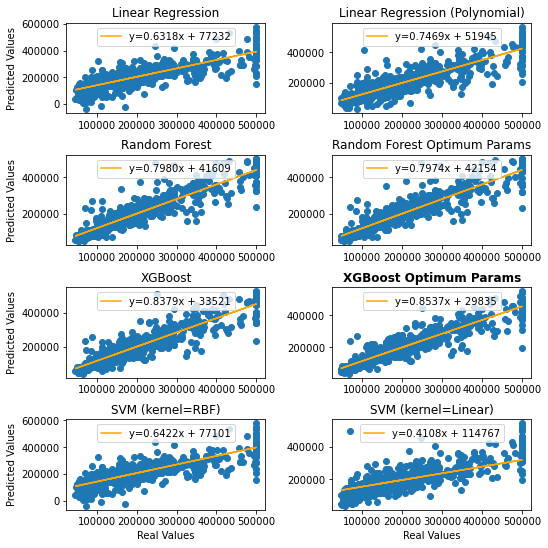

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(7.5,7.5), constrained_layout=True)
axs[0, 0].scatter(y_test[0:599], y_pred_lr[0:599])
axs[0, 0].plot(y_test[0:599], lr_equation, label = 'y=0.6318x + 77232', color='orange')
axs[0, 0].set_title("Linear Regression")
axs[0, 0].legend(loc='upper center')
axs[0, 1].scatter(y_test[0:599], y_pred_poly[0:599])
axs[0, 1].plot(y_test[0:599], poly_equation, label = 'y=0.7469x + 51945', color='orange')
axs[0, 1].set_title("Linear Regression (Polynomial)")
axs[0, 1].legend(loc='upper center')
axs[1, 0].scatter(y_test[0:599], y_pred_rfr[0:599])
axs[1, 0].plot(y_test[0:599], rfr_equation, label = 'y=0.7980x + 41609', color='orange')
axs[1, 0].set_title("Random Forest")
axs[1, 0].legend(loc='upper center')
axs[1, 1].scatter(y_test[0:599], y_pred_rfr_rand3[0:599])
axs[1, 1].plot(y_test[0:599], rfr_rand_equation, label = 'y=0.7974x + 42154', color='orange')
axs[1, 1].set_title("Random Forest Optimum Params")
axs[1, 1].legend(loc='upper center')
axs[2, 0].scatter(y_test[0:599], y_pred_xgb[0:599])
axs[2, 0].plot(y_test[0:599], xgbr_equation, label = 'y=0.8379x + 33521', color='orange')
axs[2, 0].set_title("XGBoost")
axs[2, 0].legend(loc='upper center')
axs[2, 1].scatter(y_test[0:599], y_pred_xgb_rand[0:599])
axs[2, 1].plot(y_test[0:599], xgb_rand_equation, label = 'y=0.8537x + 29835', color='orange')
axs[2, 1].set_title("XGBoost Optimum Params", weight='bold')
axs[2, 1].legend(loc='upper center')
axs[3, 0].scatter(y_test[0:599], y_pred_lr[0:599])
axs[3, 0].plot(y_test[0:599], svm_rbf_equation, label = 'y=0.6422x + 77101', color='orange')
axs[3, 0].set_title("SVM (kernel=RBF)")
axs[3, 0].legend(loc='upper center')
axs[3, 1].scatter(y_test[0:599], y_pred_reg1[0:599])
axs[3, 1].plot(y_test[0:599], svm_poly_equation, label = 'y=0.4108x + 114767', color='orange')
axs[3, 1].set_title("SVM (kernel=Linear)")
axs[3, 1].legend(loc='upper center')

# set labels
plt.setp(axs[-1, :], xlabel='Real Values')
plt.setp(axs[:, 0], ylabel='Predicted Values')
plt.show()

In [ ]:
#changing kernel linear with c=10
reg2 = svm.SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='scale', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
reg2.fit(X_train, y_train)

SVR(C=1000000, kernel='poly')

In [ ]:
y_pred_reg2 = reg2.predict(X_test)

In [ ]:
print("XGB with GridSearch: ", r2_score(y_test, y_pred_reg2))

XGB with GridSearch:  0.0653006629184818


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#R2 scores of all regression models:
print("Linear Regression: ", mean_absolute_percentage_error(y_test, y_pred_lr))
print("Polynomial Regression: ", mean_absolute_percentage_error(y_test, y_pred_poly))
print("Random Forest: ", mean_absolute_percentage_error(y_test, y_pred_rfr))
print("Random Forest through gridsearch: ", mean_absolute_percentage_error(y_test, y_pred_rfr_rand3))
print("default xgb params : ", mean_absolute_percentage_error(y_test, y_pred_xgb))
print("XGBoost through gridsearch: ", mean_absolute_percentage_error(y_test, y_pred_xgb_rand))
print("SVM with 'rbf' kernel: ", mean_absolute_percentage_error(y_test, y_pred_reg1))

Linear Regression:  0.30273659432782263
Polynomial Regression:  0.2514239899622314
Random Forest:  0.17408056560716031
Random Forest through gridsearch:  0.17415598801139445
default xgb params :  0.17803749618552628
XGBoost through gridsearch:  0.17398069495871193
SVM with 'rbf' kernel:  0.27991683764409264
